# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [11]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [12]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label)= mnist.load_data()

In [13]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [15]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
#建立模型
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10, batch_size=32, verbose=1)

W0809 23:52:53.553657 4473087424 deprecation.py:323] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0809 23:52:53.613120 4473087424 deprecation_wrapper.py:119] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.2397 - acc: 0.9268 - val_loss: 0.1050 - val_acc: 0.9675
Epoch 2/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.1008 - acc: 0.9688 - val_loss: 0.0965 - val_acc: 0.9716
Epoch 3/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.0699 - acc: 0.9787 - val_loss: 0.0976 - val_acc: 0.9711
Epoch 4/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.0524 - acc: 0.9836 - val_loss: 0.1391 - val_acc: 0.9648
Epoch 5/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.1055 - val_acc: 0.9706
Epoch 6/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.0367 - acc: 0.9884 - val_loss: 0.0984 - val_acc: 0.9731
Epoch 7/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0302 - acc: 0.9906 - val_loss: 0.1014 - 

# 以圖形顯示訓練過程

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

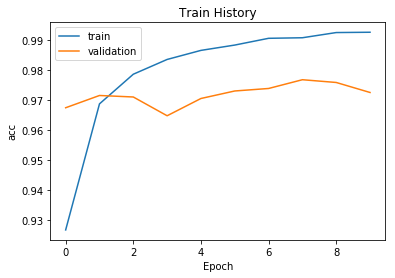

In [21]:
show_train_history(train_history,'acc','val_acc')

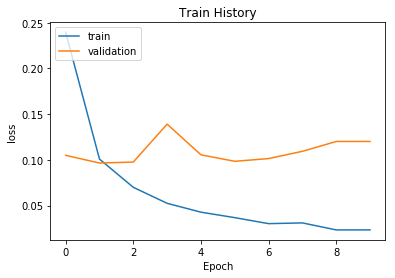

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 33us/step

accuracy= 0.9735
